##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
#%pip install pandas 
#%pip install matplotlib
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .parquet file inside that. A relative path *must* be used when loading data into pandas

In [2]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catB_train.parquet" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas import read_parquet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from joblib import dump, load
from sklearn.metrics import silhouette_score

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

In [4]:
###...code...###

In [5]:
df = read_parquet(filepath)

### Data Cleaning

In [6]:
def preprocess_data(df1):
    df = df1.copy()
    # Drop rows with more than 50% missing values
    df.dropna(thresh=len(df.columns)/2, axis=0, inplace=True)
    # for hlthclaim_amt,recency_hlthclaim, giclaim_amt, recency_cancel, recency_giclaim, hlthclaim_cnt_success, hlthclaim_cnt_unsuccess, affcon_visit_days, clmcon_visit_days, recency_clmcon, recency_clmcon_regis, recency_lapse, f_ever_declined_la replace missing values with 0, n_months_since_visit_affcon replace missing values with 9999
    df['hlthclaim_amt'].fillna(0, inplace=True)
    df['recency_hlthclaim'].fillna(0, inplace=True)
    df['giclaim_amt'].fillna(0, inplace=True)
    df['recency_cancel'].fillna(0, inplace=True)
    df['recency_giclaim'].fillna(0, inplace=True)
    df['hlthclaim_cnt_success'].fillna(0, inplace=True)
    df['hlthclaim_cnt_unsuccess'].fillna(0, inplace=True)
    df['affcon_visit_days'].fillna(0, inplace=True)
    df['clmcon_visit_days'].fillna(0, inplace=True)
    df['recency_clmcon'].fillna(0, inplace=True)
    df['recency_clmcon_regis'].fillna(0, inplace=True)
    df['recency_lapse'].fillna(0, inplace=True)
    df['f_ever_declined_la'].fillna(0, inplace=True)
    df['n_months_since_visit_affcon'].fillna(9999, inplace=True)
    # Select columns that start with 'flg_affconnect' and replace NaN with 0
    columns_to_change = df.filter(regex='^flg_affconnect').columns
    df[columns_to_change] = df[columns_to_change].fillna(0)
    df['tot_cancel_pols'].fillna(0, inplace=True)
    # Create a new column 'sumins' by summing all columns that start with 'sumins'
    df['sumins'] = df.filter(regex='^sumins').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^sumins').columns
    columns_to_change = columns_to_change[columns_to_change != 'sumins']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Create a new column 'premaid' by summing all columns that start with 'premaid'
    df['prempaid'] = df.filter(regex='^prempaid').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^prempaid').columns
    columns_to_change = columns_to_change[columns_to_change != 'prepmaid']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Drop columns that start with 'f_hold_'
    columns_to_drop = df.filter(regex='^f_hold_').columns
    df.drop(columns=columns_to_drop, inplace=True)
    # Create a new column 'ape' by summing all columns that start with 'ape'
    df['ape'] = df.filter(regex='^ape').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^ape').columns
    columns_to_change = columns_to_change[columns_to_change != 'ape']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Create a new column 'lapse' by summing all columns that start with 'lapse'
    df['lapse'] = df.filter(regex='^lapse').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^lapse').columns
    columns_to_change = columns_to_change[columns_to_change != 'lapse']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Create a new column 'number_of_products_bought' by summing all columns that start with 'f_ever_bought'
    df['n_products_bought'] = df.filter(regex='^f_ever_bought').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^f_ever_bought').columns

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Create a new column 'recency_hlthclaim' by summing all columns that start with 'recency_hlthclaim'
    df['recency_hlthclaim'] = df.filter(regex='^recency_hlthclaim').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^recency_hlthclaim').columns
    columns_to_change = columns_to_change[columns_to_change != 'recency_hlthclaim']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Change min_occ_date to its year(first four characters) and cltdob_fixed to its age
    # Remove row if min_occ_date is None
    df = df[df['min_occ_date']!= 'None']
    df['account_age'] = 2024 - df['min_occ_date'].str[:4].astype(int)
    df.drop(columns=['min_occ_date'], inplace=True)
    df = df[df['cltdob_fix']!= 'None']
    df['age'] = 2024 - df['cltdob_fix'].str[:4].astype(int)
    df.drop(columns=['cltdob_fix'], inplace=True)
    
    df.drop(columns=['clntnum', 'hh_size', 'giclaim_cnt_success', 'giclaim_cnt_unsuccess', 'recency_giclaim_unsuccess', 'recency_giclaim_success', 'is_dependent_in_at_least_1_policy'], axis=1, inplace=True)

    # if target column is present in the dataframe, drop it
    if 'f_purchase_lh' in df.columns:
        df.drop(columns=['f_purchase_lh'], inplace=True)

    # Select columns that start with 'n_months_since_lapse' and replace NaN with 9999
    columns_to_change = df.filter(regex='^n_months_since_lapse').columns
    df[columns_to_change] = df[columns_to_change].fillna(9999)

    # Make sure thay are all integers
    df[columns_to_change] = df[columns_to_change].astype(int)

    # Create a new column 'n_month_since_lapse' with the minimum value from the selected columns
    df['n_months_since_lapse'] = df[columns_to_change].min(axis=1)

    # Ensure that the minimum value is not less than 0
    df['n_months_since_lapse'] = df['n_months_since_lapse'].clip(lower=0)

    # Drop the selected columns
    df.drop(columns=columns_to_change, inplace=True)
    # Select columns that start with 'n_months_last_bought' and replace NaN with 9999
    columns_to_change = df.filter(regex='^n_months_last_bought').columns
    df[columns_to_change] = df[columns_to_change].fillna(9999)

    # Make sure thay are all integers
    df[columns_to_change] = df[columns_to_change].astype(int)

    # Create a new column 'n_months_since_lapse' with the minimum value from the selected columns
    df['n_months_last_bought'] = df[columns_to_change].min(axis=1)

    # Ensure that the minimum value is not less than 0
    df['n_months_last_bought'] = df['n_months_last_bought'].clip(lower=0)

    # Drop the selected columns
    df.drop(columns=columns_to_change, inplace=True)
    # Select columns that start with flg_gi_claim and ends with _ever
    columns_to_change = df.filter(regex='^flg_gi_claim.*_ever$').columns
    df[columns_to_change] = df[columns_to_change].fillna(0)

    # Make sure thay are all integers
    df[columns_to_change] = df[columns_to_change].astype(int)

    # Create a new column 'n_months_since_lapse' with the max value from the selected columns
    df['flg_gi_claim_ever'] = df[columns_to_change].max(axis=1)

    # Ensure that the minimum value is not less than 0
    df['n_months_last_bought'] = df['n_months_last_bought'].clip(lower=0)

    # Drop the selected columns
    df.drop(columns=columns_to_change, inplace=True)

    # Drop the flg_gi_claim_ever column as it has only 1 unique value
    df.drop(columns=['flg_gi_claim_ever'], inplace=True)
    # Select columns that start with flg_hlthclaim and ends with _ever
    columns_to_change = df.filter(regex='^flg_hlthclaim.*_ever$').columns
    df[columns_to_change] = df[columns_to_change].fillna(0)

    # Make sure thay are all integers
    df[columns_to_change] = df[columns_to_change].astype(int)

    # Create a new column 'n_months_since_lapse' with the max value from the selected columns
    df['flg_hlthclaim_ever'] = df[columns_to_change].max(axis=1)

    # Ensure that the minimum value is not less than 0
    df['flg_hlthclaim_ever'] = df['flg_hlthclaim_ever'].clip(lower=0)

    # Drop the selected columns
    df.drop(columns=columns_to_change, inplace=True)
    # Identify string columns
    string_columns = df.select_dtypes(include=['object']).columns
    string_columns = [col for col in string_columns if not all(pd.to_numeric(df[col], errors='coerce').notna())]
    #print(string_columns)
    global label_mappings
    label_mappings = {}

    for col in string_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        # Store the mapping for this column
        label_mappings[col] = {index: label for index, label in enumerate(le.classes_)}
    

    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Identify pairs of highly correlated columns
    high_corr_var = set()  # Set to keep track of columns to drop
    threshold = 0.8  # Define your threshold here

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold and corr_matrix.columns[j] not in high_corr_var:
                column = corr_matrix.columns[i]
                high_corr_var.add(column)

    # Drop highly correlated columns
    df.drop(columns=high_corr_var, inplace=True)
    # Drop rows withmissing values
    df.dropna(inplace=True)

    cat_cols = df.columns[(df.nunique() > 2) & (df.nunique() < 11)]
    cat_cols = cat_cols.union(['ctrycode_desc'])
    num_cols = df.columns[(df.nunique() >= 11) | (df.nunique() == 2)]  # Numerical or binary columns
    #print(cat_cols)
    # Create transformers
    numeric_transformer = MinMaxScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a column transformer to apply transformations to the respective columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_cols),
            ('cat', categorical_transformer, cat_cols)
        ])

    # Fit and transform the df
    df_transformed = preprocessor.fit_transform(df)

    # Getting new column names for the one-hot encoded columns
    one_hot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
    new_column_names = list(num_cols) + list(one_hot_columns)

    # Create a new DataFrame with these column names
    df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)

    return df_transformed

In [26]:

def preprocess_data_keep_clntnum(df1):
    # Drop rows with more than 50% missing values
    df = df1.copy()
    df.dropna(thresh=len(df.columns)/2, axis=0, inplace=True)
    # for hlthclaim_amt,recency_hlthclaim, giclaim_amt, recency_cancel, recency_giclaim, hlthclaim_cnt_success, hlthclaim_cnt_unsuccess, affcon_visit_days, clmcon_visit_days, recency_clmcon, recency_clmcon_regis, recency_lapse, f_ever_declined_la replace missing values with 0, n_months_since_visit_affcon replace missing values with 9999
    df['hlthclaim_amt'].fillna(0, inplace=True)
    df['recency_hlthclaim'].fillna(0, inplace=True)
    df['giclaim_amt'].fillna(0, inplace=True)
    df['recency_cancel'].fillna(0, inplace=True)
    df['recency_giclaim'].fillna(0, inplace=True)
    df['hlthclaim_cnt_success'].fillna(0, inplace=True)
    df['hlthclaim_cnt_unsuccess'].fillna(0, inplace=True)
    df['affcon_visit_days'].fillna(0, inplace=True)
    df['clmcon_visit_days'].fillna(0, inplace=True)
    df['recency_clmcon'].fillna(0, inplace=True)
    df['recency_clmcon_regis'].fillna(0, inplace=True)
    df['recency_lapse'].fillna(0, inplace=True)
    df['f_ever_declined_la'].fillna(0, inplace=True)
    df['n_months_since_visit_affcon'].fillna(9999, inplace=True)
    # Select columns that start with 'flg_affconnect' and replace NaN with 0
    columns_to_change = df.filter(regex='^flg_affconnect').columns
    df[columns_to_change] = df[columns_to_change].fillna(0)
    df['tot_cancel_pols'].fillna(0, inplace=True)
    # Create a new column 'sumins' by summing all columns that start with 'sumins'
    df['sumins'] = df.filter(regex='^sumins').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^sumins').columns
    columns_to_change = columns_to_change[columns_to_change != 'sumins']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Create a new column 'premaid' by summing all columns that start with 'premaid'
    df['prempaid'] = df.filter(regex='^prempaid').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^prempaid').columns
    columns_to_change = columns_to_change[columns_to_change != 'prepmaid']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Drop columns that start with 'f_hold_'
    columns_to_drop = df.filter(regex='^f_hold_').columns
    df.drop(columns=columns_to_drop, inplace=True)
    # Create a new column 'ape' by summing all columns that start with 'ape'
    df['ape'] = df.filter(regex='^ape').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^ape').columns
    columns_to_change = columns_to_change[columns_to_change != 'ape']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Create a new column 'lapse' by summing all columns that start with 'lapse'
    df['lapse'] = df.filter(regex='^lapse').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^lapse').columns
    columns_to_change = columns_to_change[columns_to_change != 'lapse']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Create a new column 'number_of_products_bought' by summing all columns that start with 'f_ever_bought'
    df['n_products_bought'] = df.filter(regex='^f_ever_bought').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^f_ever_bought').columns

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Create a new column 'recency_hlthclaim' by summing all columns that start with 'recency_hlthclaim'
    df['recency_hlthclaim'] = df.filter(regex='^recency_hlthclaim').sum(axis=1)

    # Get a list of all column names that start with 'sumins' but not the newly created 'sumins' column
    columns_to_change = df.filter(regex='^recency_hlthclaim').columns
    columns_to_change = columns_to_change[columns_to_change != 'recency_hlthclaim']

    # Drop these columns
    df.drop(columns=columns_to_change, inplace=True)
    # Change min_occ_date to its year(first four characters) and cltdob_fixed to its age
    # Remove row if min_occ_date is None
    df = df[df['min_occ_date']!= 'None']
    df['account_age'] = 2024 - df['min_occ_date'].str[:4].astype(int)
    df.drop(columns=['min_occ_date'], inplace=True)
    df = df[df['cltdob_fix']!= 'None']
    df['age'] = 2024 - df['cltdob_fix'].str[:4].astype(int)
    df.drop(columns=['cltdob_fix'], inplace=True)
    
    df.drop(columns=['hh_size', 'giclaim_cnt_success', 'giclaim_cnt_unsuccess', 'recency_giclaim_unsuccess', 'recency_giclaim_success', 'is_dependent_in_at_least_1_policy'], axis=1, inplace=True)

    # if target column is present in the dataframe, drop it
    if 'f_purchase_lh' in df.columns:
        df.drop(columns=['f_purchase_lh'], inplace=True)

    # Select columns that start with 'n_months_since_lapse' and replace NaN with 9999
    columns_to_change = df.filter(regex='^n_months_since_lapse').columns
    df[columns_to_change] = df[columns_to_change].fillna(9999)

    # Make sure thay are all integers
    df[columns_to_change] = df[columns_to_change].astype(int)

    # Create a new column 'n_month_since_lapse' with the minimum value from the selected columns
    df['n_months_since_lapse'] = df[columns_to_change].min(axis=1)

    # Ensure that the minimum value is not less than 0
    df['n_months_since_lapse'] = df['n_months_since_lapse'].clip(lower=0)

    # Drop the selected columns
    df.drop(columns=columns_to_change, inplace=True)
    # Select columns that start with 'n_months_last_bought' and replace NaN with 9999
    columns_to_change = df.filter(regex='^n_months_last_bought').columns
    df[columns_to_change] = df[columns_to_change].fillna(9999)

    # Make sure thay are all integers
    df[columns_to_change] = df[columns_to_change].astype(int)

    # Create a new column 'n_months_since_lapse' with the minimum value from the selected columns
    df['n_months_last_bought'] = df[columns_to_change].min(axis=1)

    # Ensure that the minimum value is not less than 0
    df['n_months_last_bought'] = df['n_months_last_bought'].clip(lower=0)

    # Drop the selected columns
    df.drop(columns=columns_to_change, inplace=True)
    # Select columns that start with flg_gi_claim and ends with _ever
    columns_to_change = df.filter(regex='^flg_gi_claim.*_ever$').columns
    df[columns_to_change] = df[columns_to_change].fillna(0)

    # Make sure thay are all integers
    df[columns_to_change] = df[columns_to_change].astype(int)

    # Create a new column 'n_months_since_lapse' with the max value from the selected columns
    df['flg_gi_claim_ever'] = df[columns_to_change].max(axis=1)

    # Ensure that the minimum value is not less than 0
    df['n_months_last_bought'] = df['n_months_last_bought'].clip(lower=0)

    # Drop the selected columns
    df.drop(columns=columns_to_change, inplace=True)

    # Drop the flg_gi_claim_ever column as it has only 1 unique value
    df.drop(columns=['flg_gi_claim_ever'], inplace=True)
    # Select columns that start with flg_hlthclaim and ends with _ever
    columns_to_change = df.filter(regex='^flg_hlthclaim.*_ever$').columns
    df[columns_to_change] = df[columns_to_change].fillna(0)

    # Make sure thay are all integers
    df[columns_to_change] = df[columns_to_change].astype(int)

    # Create a new column 'n_months_since_lapse' with the max value from the selected columns
    df['flg_hlthclaim_ever'] = df[columns_to_change].max(axis=1)

    # Ensure that the minimum value is not less than 0
    df['flg_hlthclaim_ever'] = df['flg_hlthclaim_ever'].clip(lower=0)

    # Drop the selected columns
    df.drop(columns=columns_to_change, inplace=True)
    # Identify string columns
    string_columns = df.select_dtypes(include=['object']).columns
    string_columns = string_columns[string_columns != 'clntnum']
    string_columns = [col for col in string_columns if not all(pd.to_numeric(df[col], errors='coerce').notna())]
    global label_mappings
    label_mappings = {}

    for col in string_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        # Store the mapping for this column
        label_mappings[col] = {index: label for index, label in enumerate(le.classes_)}
    

    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Identify pairs of highly correlated columns
    high_corr_var = set()  # Set to keep track of columns to drop
    threshold = 0.8  # Define your threshold here

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold and corr_matrix.columns[j] not in high_corr_var:
                column = corr_matrix.columns[i]
                high_corr_var.add(column)

    # Drop highly correlated columns
    df.drop(columns=high_corr_var, inplace=True)
    # Drop rows withmissing values
    df.dropna(inplace=True)
    

    cat_cols = df.columns[(df.nunique() > 2) & (df.nunique() < 11)]
    cat_cols = cat_cols.union(['ctrycode_desc'])
    num_cols = df.columns[(df.nunique() >= 11) | (df.nunique() == 2)]  # Numerical or binary columns
    num_cols = num_cols[num_cols != 'clntnum']
    
    #print(cat_cols)
    # Create transformers
    numeric_transformer = MinMaxScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a column transformer to apply transformations to the respective columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_cols),
            ('cat', categorical_transformer, cat_cols)
        ],
        remainder='passthrough')

    # Fit and transform the df
    df_transformed = preprocessor.fit_transform(df)

    # Getting new column names for the one-hot encoded columns
    one_hot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
    new_column_names = list(num_cols) + list(one_hot_columns) + ['clntnum']

    # Create a new DataFrame with these column names
    df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)
    
    

    return df_transformed

             
        

### Hierarchical Clustering

In [8]:
np.random.seed(42)

In [9]:
df_transformed = preprocess_data(df)

In [27]:
df_with_clntnum = preprocess_data_keep_clntnum(df)

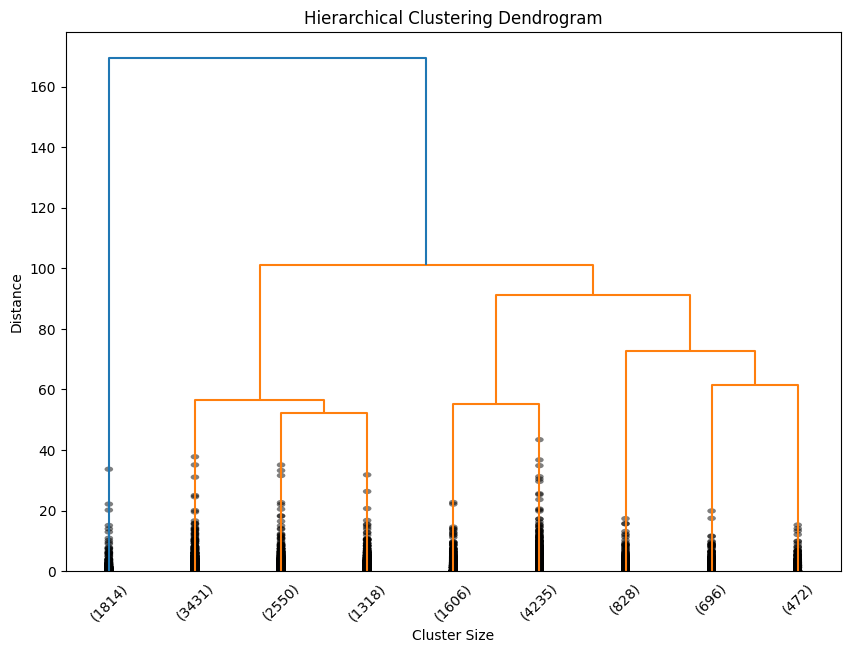

In [28]:
# Hierarchical clustering
Z = linkage(df_transformed, method='ward')

# Store the linkage
np.save('linkage.npy', Z)

# Create a dendrogram to visualize the linkage
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z, truncate_mode='lastp', p=9 , leaf_rotation=45., leaf_font_size=10., show_contracted=True)
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()


In [46]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram at distance 40 to form clusters
cluster_labels = fcluster(Z, t=50, criterion='distance')

# Add these cluster labels to your original DataFrame
df_transformed['cluster_labels'] = cluster_labels

# Calculate the mean for each cluster
cluster_characteristics = df_transformed.groupby('cluster_labels').mean()

In [33]:
cluster_labels = fcluster(Z, t=60, criterion='distance')

In [34]:
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print(cluster_counts)

{1: 1814, 2: 7299, 3: 5841, 4: 828, 5: 696, 6: 472}


In [35]:
df_with_clntnum['cluster_labels'] = cluster_labels

In [36]:
target_cols = pd.concat([df['clntnum'], df['f_purchase_lh']], axis=1)

df_with_clntnum = pd.merge(df_with_clntnum, target_cols, on='clntnum', how='inner')


In [37]:
df_with_clntnum.to_csv('clustered_data.csv')

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Split the data into X and y
X_train = df_transformed.drop(columns=['cluster_labels'])
y_train = cluster_labels

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [39]:
score = silhouette_score(df_transformed, cluster_labels)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.280


In [40]:
# Save the model locally
dump(knn, 'knn.joblib')

['knn.joblib']

In [16]:
cluster_characteristics.to_csv('data/catB_train_cluster_characteristics.csv')

In [43]:
## percentage of f_purchase_lh = 1 in each cluster
proportion = df_with_clntnum.groupby('cluster_labels')['f_purchase_lh'].sum()/df_with_clntnum.groupby('cluster_labels')['clntnum'].count()
proportion

cluster_labels
1    0.007718
2    0.046308
3    0.053587
4    0.025362
5    0.012931
6    0.006356
dtype: float64

In [47]:
cluster_characteristics




,ctrycode_desc,flg_substandard,flg_is_borderline_standard,flg_is_revised_term,flg_is_rental_flat,flg_has_health_claim,flg_has_life_claim,flg_gi_claim,flg_is_proposal,flg_with_preauthorisation,...,recency_clmcon_5.0,stat_flag_0,stat_flag_1,stat_flag_2,tot_cancel_pols_0.0,tot_cancel_pols_1.0,tot_cancel_pols_2.0,tot_cancel_pols_3.0,tot_cancel_pols_4.0,tot_cancel_pols_6.0
cluster_labels,,,,,,,,,,,,,,,,,,,,,
1,0.615809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001654,0.000000,...,0.009372,0.997795,0.002205,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.615385,0.037890,0.027689,0.000583,0.025940,0.028272,0.004955,0.025066,0.001166,0.004080,...,0.002332,0.999709,0.000291,0.000000,0.997085,0.001749,0.000874,0.000000,0.000291,0.000000
3,0.615385,0.052941,0.031373,0.000392,0.005490,0.012157,0.006667,0.032157,0.002745,0.002745,...,0.001176,0.999216,0.000392,0.000392,0.992157,0.002745,0.004706,0.000392,0.000000,0.000000
4,0.615385,0.068285,0.142640,0.001517,0.009105,0.421093,0.009863,0.018968,0.008346,0.075114,...,0.009863,0.999241,0.000759,0.000000,0.972686,0.019727,0.007587,0.000000,0.000000,0.000000
5,0.615385,0.043587,0.028020,0.001868,0.010585,0.009340,0.001245,0.023039,0.003736,0.001245,...,0.001245,0.996887,0.003113,0.000000,0.996264,0.000623,0.000623,0.002491,0.000000,0.000000
6,0.615366,0.057143,0.034475,0.000945,0.016765,0.027391,0.002361,0.075561,0.003778,0.004250,...,0.001889,0.997639,0.002361,0.000000,0.877922,0.107674,0.010153,0.003070,0.000708,0.000472
7,0.616314,0.000000,0.000000,0.000000,0.003623,0.000000,0.000000,0.000000,0.001208,0.000000,...,0.001208,0.998792,0.001208,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.615385,0.002874,0.004310,0.000000,0.004310,0.001437,0.001437,0.007184,0.000000,0.000000,...,0.000000,0.002874,0.981322,0.015805,0.994253,0.005747,0.000000,0.000000,0.000000,0.000000
9,0.569345,0.029661,0.010593,0.000000,0.006356,0.027542,0.002119,0.006356,0.002119,0.000000,...,0.004237,0.927966,0.072034,0.000000,0.987288,0.012712,0.000000,0.000000,0.000000,0.000000


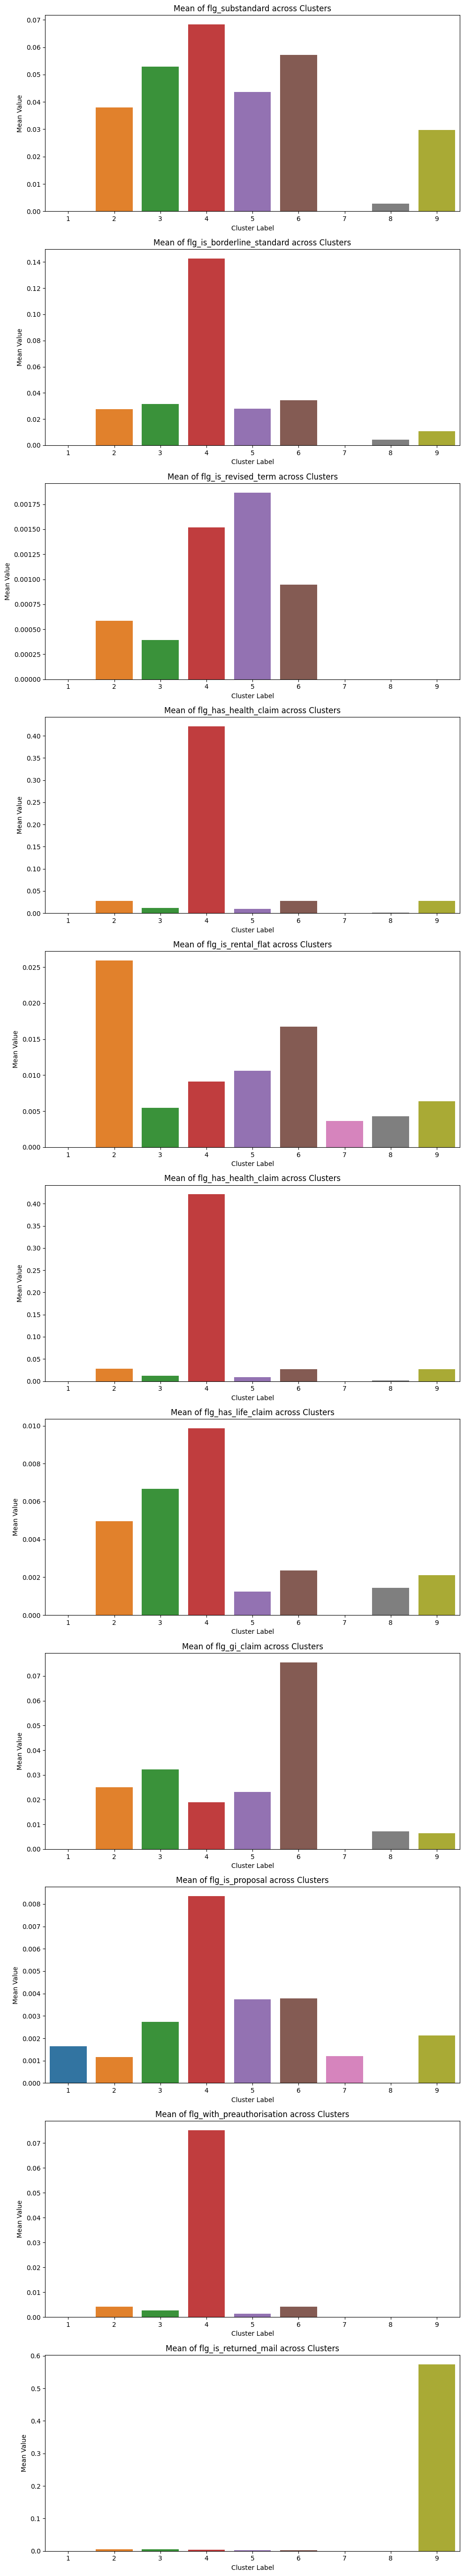

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a subset of features for visualization
# This is just a demonstration, you should select the features that are most relevant in your context
selected_features = ['flg_substandard', 'flg_is_borderline_standard', 'flg_is_revised_term', 
                     'flg_has_health_claim','flg_is_rental_flat','flg_has_health_claim', 
                     'flg_has_life_claim', 'flg_gi_claim','flg_is_proposal','flg_with_preauthorisation',
                     'flg_is_returned_mail']

# Creating subplots
fig, axes = plt.subplots(len(selected_features), 1, figsize=(10, 5 * len(selected_features)))

# Plotting each feature
for i, feature in enumerate(selected_features):
    sns.barplot(x=cluster_characteristics.index, y=cluster_characteristics[feature], ax=axes[i])
    axes[i].set_title(f'Mean of {feature} across Clusters')
    axes[i].set_ylabel('Mean Value')
    axes[i].set_xlabel('Cluster Label')

plt.tight_layout()
plt.show()

In [ ]:
demographic_features = ['age', 'account_age', 'n_products_bought', 'n_months_last_bought', 'n_months_since_lapse']


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [17]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''
    df_transformed = preprocess_data(hidden_data)
    knn_model = load('knn.joblib')
    result = knn_model.predict(df_transformed.values)
    label_mapping = {1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 1}
    
    def map_labels(label):
        return label_mapping.get(label, 0)  # Default to 0 if label not in mapping
    
    result = np.vectorize(map_labels)(result)

    return result

##### Cell to check testing_hidden_data function

In [18]:
# This cell should output a list of predictions.
test_df = pd.read_parquet(filepath)
test_df = test_df.drop(columns=["f_purchase_lh"])
print(testing_hidden_data(test_df))

[1 1 1 ... 1 1 1]


In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual file name
file_path = 'output.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Transpose the DataFrame
df_transposed = df.T

# Save the transposed DataFrame to a new CSV file
df_transposed.to_csv('transposed_file.csv', index=False)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16760\196398884.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df1 = pd.read_csv('transposed_file.csv')

### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!